In [103]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [104]:
df = pd.read_csv(r"global_food_wastage_dataset.csv")

In [105]:
df.head(4)

,Country,Year,Food Category,Total Waste (Tons),Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%)
0,Australia,2019,Fruits & Vegetables,19268.63,18686.68,72.69,87.59,53.64
1,Indonesia,2019,Prepared Food,3916.97,4394.48,192.52,1153.99,30.61
2,Germany,2022,Dairy Products,9700.16,8909.16,166.94,1006.11,48.08
3,France,2023,Fruits & Vegetables,46299.69,40551.22,120.19,953.05,31.91


In [106]:
df.columns

Index(['Country', 'Year', 'Food Category', 'Total Waste (Tons)',
       'Economic Loss (Million $)', 'Avg Waste per Capita (Kg)',
       'Population (Million)', 'Household Waste (%)'],
      dtype='object')

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    5000 non-null   object 
 1   Year                       5000 non-null   int64  
 2   Food Category              5000 non-null   object 
 3   Total Waste (Tons)         5000 non-null   float64
 4   Economic Loss (Million $)  5000 non-null   float64
 5   Avg Waste per Capita (Kg)  5000 non-null   float64
 6   Population (Million)       5000 non-null   float64
 7   Household Waste (%)        5000 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 312.6+ KB


In [108]:
df.isnull().sum()

Country                      0
Year                         0
Food Category                0
Total Waste (Tons)           0
Economic Loss (Million $)    0
Avg Waste per Capita (Kg)    0
Population (Million)         0
Household Waste (%)          0
dtype: int64

In [109]:
df.head(2)

,Country,Year,Food Category,Total Waste (Tons),Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%)
0,Australia,2019,Fruits & Vegetables,19268.63,18686.68,72.69,87.59,53.64
1,Indonesia,2019,Prepared Food,3916.97,4394.48,192.52,1153.99,30.61


In [110]:
cat_cols = ['Country', "Food Category",'Year']

In [111]:
num_cols = ['Total Waste (Tons)', 'Economic Loss (Million $)', 'Avg Waste per Capita (Kg)', 'Population (Million)', 'Household Waste (%)']

Encoding for Cat cols

In [112]:
df['Country'].value_counts()

Country
Germany         287
Spain           274
China           262
Brazil          258
USA             257
India           257
Turkey          256
Canada          254
Italy           253
Mexico          251
South Africa    245
Indonesia       244
UK              242
South Korea     241
Japan           240
Saudi Arabia    239
France          239
Argentina       238
Russia          237
Australia       226
Name: count, dtype: int64

In [113]:
df['Food Category'].value_counts()

Food Category
Prepared Food          711
Beverages              639
Bakery Items           630
Fruits & Vegetables    620
Dairy Products         616
Meat & Seafood         605
Frozen Food            596
Grains & Cereals       583
Name: count, dtype: int64

In [114]:
df['Year'].value_counts()

Year
2023    737
2021    734
2020    731
2024    721
2018    708
2019    691
2022    678
Name: count, dtype: int64

In [115]:
df = pd.get_dummies(df, columns=['Country', 'Food Category', 'Year'], drop_first=True)

In [116]:
df = df.astype(int)

In [117]:
df.head(3)

,Total Waste (Tons),Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%),Country_Australia,Country_Brazil,Country_Canada,Country_China,Country_France,...,Food Category_Fruits & Vegetables,Food Category_Grains & Cereals,Food Category_Meat & Seafood,Food Category_Prepared Food,Year_2019,Year_2020,Year_2021,Year_2022,Year_2023,Year_2024
0,19268,18686,72,87,53,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,3916,4394,192,1153,30,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
2,9700,8909,166,1006,48,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [118]:
df.columns

Index(['Total Waste (Tons)', 'Economic Loss (Million $)',
       'Avg Waste per Capita (Kg)', 'Population (Million)',
       'Household Waste (%)', 'Country_Australia', 'Country_Brazil',
       'Country_Canada', 'Country_China', 'Country_France', 'Country_Germany',
       'Country_India', 'Country_Indonesia', 'Country_Italy', 'Country_Japan',
       'Country_Mexico', 'Country_Russia', 'Country_Saudi Arabia',
       'Country_South Africa', 'Country_South Korea', 'Country_Spain',
       'Country_Turkey', 'Country_UK', 'Country_USA',
       'Food Category_Beverages', 'Food Category_Dairy Products',
       'Food Category_Frozen Food', 'Food Category_Fruits & Vegetables',
       'Food Category_Grains & Cereals', 'Food Category_Meat & Seafood',
       'Food Category_Prepared Food', 'Year_2019', 'Year_2020', 'Year_2021',
       'Year_2022', 'Year_2023', 'Year_2024'],
      dtype='object')

In [119]:
df.describe()

,Total Waste (Tons),Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%),Country_Australia,Country_Brazil,Country_Canada,Country_China,Country_France,...,Food Category_Fruits & Vegetables,Food Category_Grains & Cereals,Food Category_Meat & Seafood,Food Category_Prepared Food,Year_2019,Year_2020,Year_2021,Year_2022,Year_2023,Year_2024
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.00000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,25061.286400,25039.208200,108.974200,706.109400,49.566600,0.045200,0.05160,0.050800,0.052400,0.047800,...,0.124000,0.116600,0.12100,0.14220,0.138200,0.146200,0.146800,0.135600,0.14740,0.144200
std,14245.119449,14620.234515,51.930373,402.541131,11.594777,0.207763,0.22124,0.219611,0.222855,0.213364,...,0.329615,0.320975,0.32616,0.34929,0.345144,0.353342,0.353942,0.342398,0.35454,0.351328
min,502.000000,406.000000,20.000000,11.000000,30.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,12783.500000,12611.750000,64.000000,350.000000,39.750000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,24864.500000,24427.500000,110.000000,713.000000,50.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,37470.500000,37145.500000,154.000000,1057.000000,60.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
max,49990.000000,59228.000000,199.000000,1399.000000,70.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


In [120]:
df = pd.DataFrame(df)

IQR Method for checking Outlier

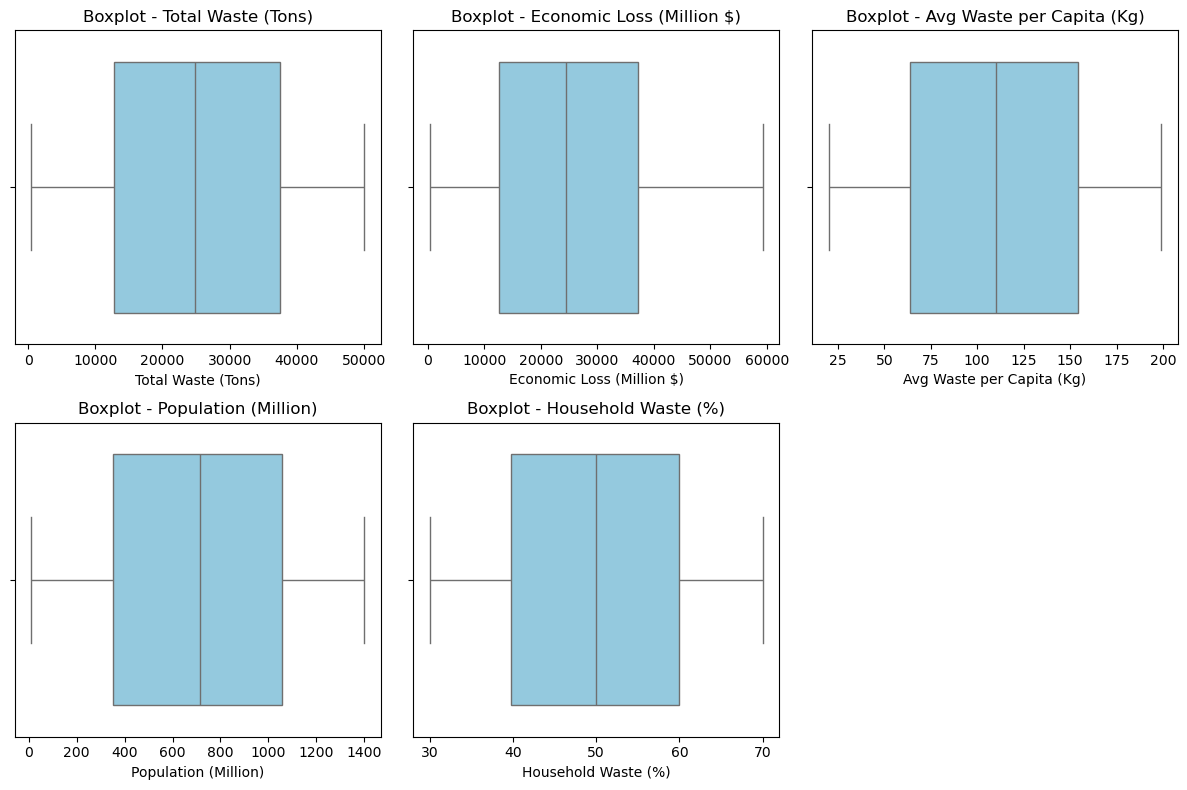

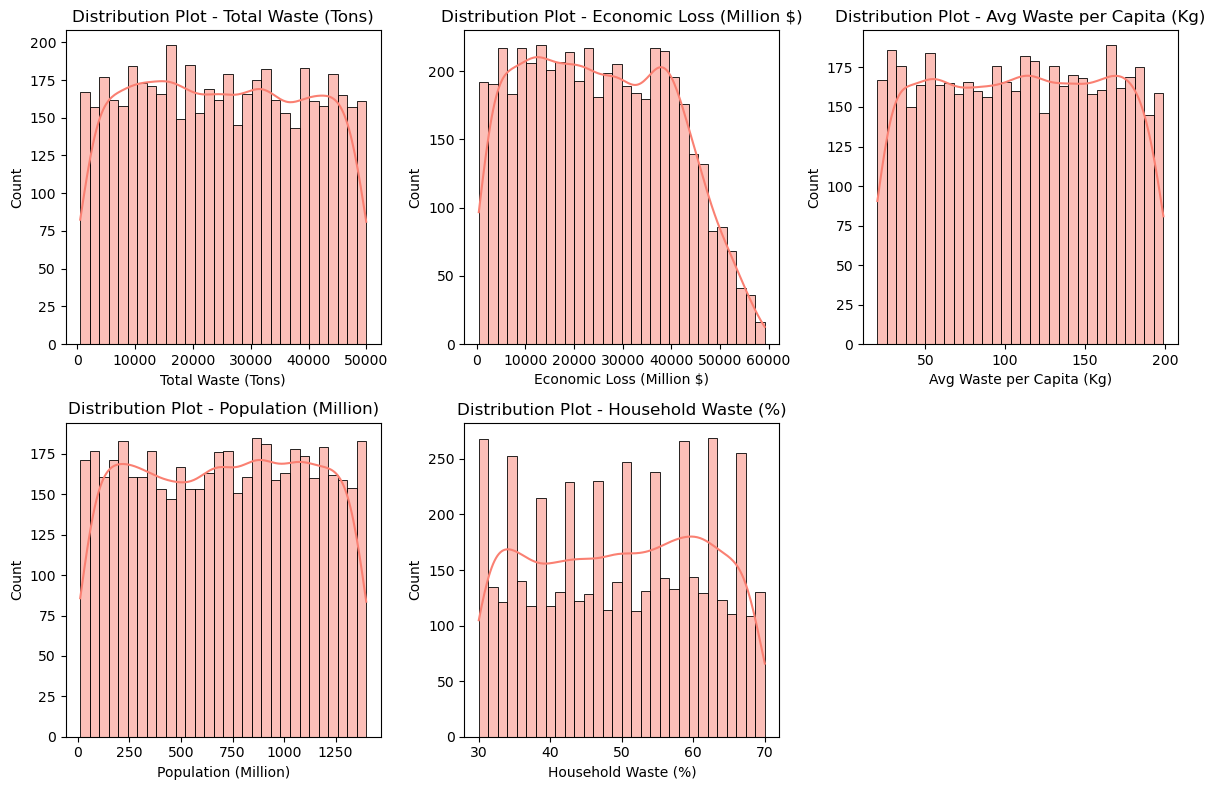

In [121]:
num_cols = ['Total Waste (Tons)', 'Economic Loss (Million $)', 'Avg Waste per Capita (Kg)', 'Population (Million)', 'Household Waste (%)']

plt.figure(figsize=(12, 8))

for i, col in enumerate(num_cols):
    plt.subplot(2, len(num_cols)//2 + 1, i + 1)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot - {col}')

plt.tight_layout()
plt.show()

# Distribution Plots
plt.figure(figsize=(12, 8))

for i, col in enumerate(num_cols):
    plt.subplot(2, len(num_cols)//2 + 1, i + 1)
    sns.histplot(df[col], bins=30, kde=True, color='salmon')
    plt.title(f'Distribution Plot - {col}')

plt.tight_layout()
plt.show()


IQR Method - Visualization

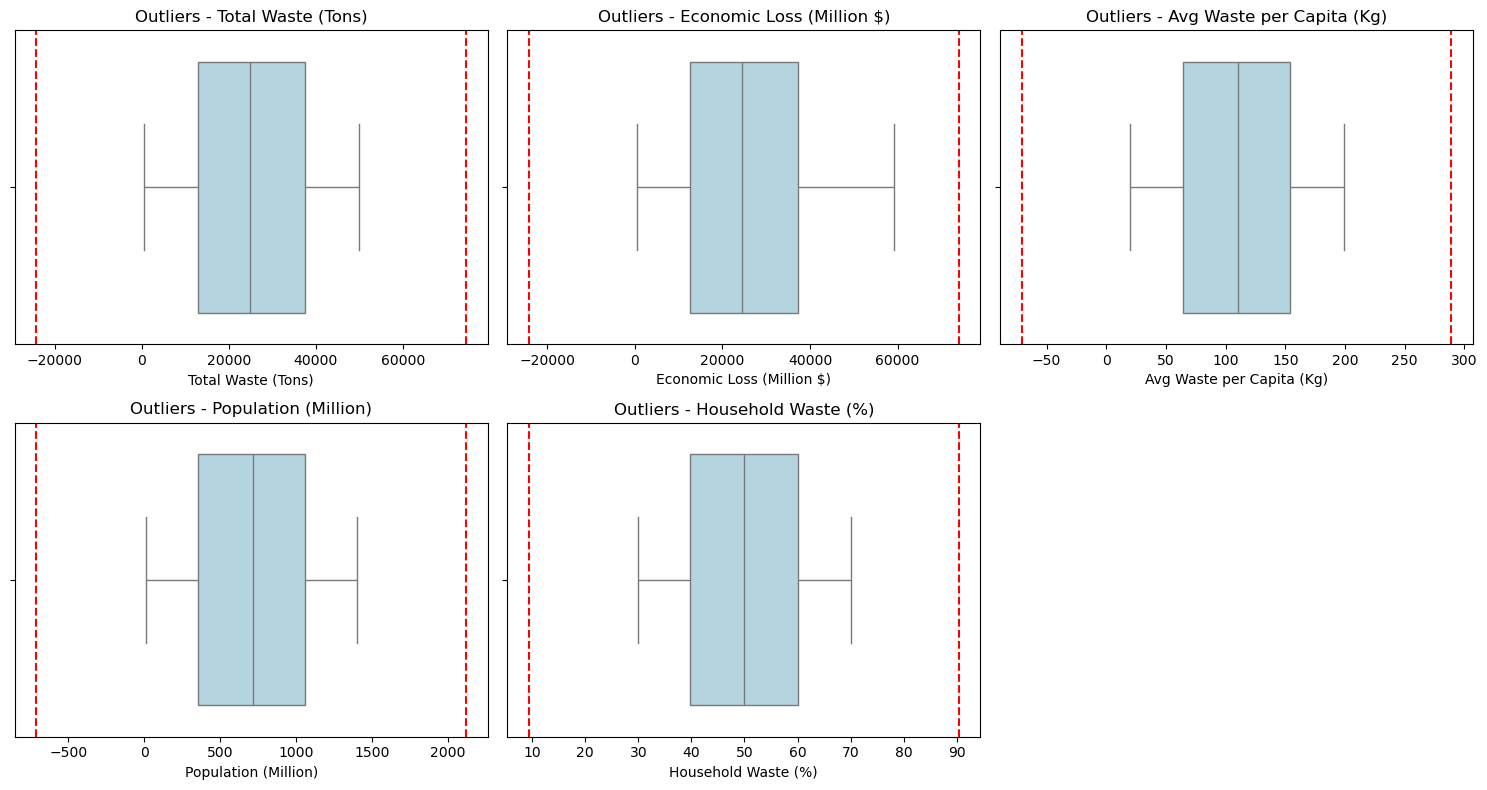

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))

for i, col in enumerate(num_cols):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    plt.subplot(2, len(num_cols)//2 + 1, i + 1)
    sns.boxplot(x=df[col], color='lightblue')
    plt.axvline(lower_bound, color='red', linestyle='--')
    plt.axvline(upper_bound, color='red', linestyle='--')
    plt.title(f'Outliers - {col}')

plt.tight_layout()
plt.show()


In [123]:
import pandas as pd

# Define numeric columns for checking outliers
num_cols = ['Total Waste (Tons)', 'Economic Loss (Million $)', 'Avg Waste per Capita (Kg)', 'Population (Million)', 'Household Waste (%)']

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    print(f"Outliers in '{col}': {len(outliers)}")
    print(outliers[[col]])
    print("-" * 50)


Outliers in 'Total Waste (Tons)': 0
Empty DataFrame
Columns: [Total Waste (Tons)]
Index: []
--------------------------------------------------
Outliers in 'Economic Loss (Million $)': 0
Empty DataFrame
Columns: [Economic Loss (Million $)]
Index: []
--------------------------------------------------
Outliers in 'Avg Waste per Capita (Kg)': 0
Empty DataFrame
Columns: [Avg Waste per Capita (Kg)]
Index: []
--------------------------------------------------
Outliers in 'Population (Million)': 0
Empty DataFrame
Columns: [Population (Million)]
Index: []
--------------------------------------------------
Outliers in 'Household Waste (%)': 0
Empty DataFrame
Columns: [Household Waste (%)]
Index: []
--------------------------------------------------


In [124]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

num_cols = ['Total Waste (Tons)', 'Economic Loss (Million $)', 'Avg Waste per Capita (Kg)', 'Population (Million)', 'Household Waste (%)']

df[num_cols] = scaler.fit_transform(df[num_cols])

In [125]:
df.head(3)

,Total Waste (Tons),Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%),Country_Australia,Country_Brazil,Country_Canada,Country_China,Country_France,...,Food Category_Fruits & Vegetables,Food Category_Grains & Cereals,Food Category_Meat & Seafood,Food Category_Prepared Food,Year_2019,Year_2020,Year_2021,Year_2022,Year_2023,Year_2024
0,-0.406726,-0.434592,-0.712067,-1.538157,0.296146,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,-1.484537,-1.412240,1.598951,1.110285,-1.687704,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
2,-1.078462,-1.103390,1.098230,0.745068,-0.135126,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# Feature Engineering

In [126]:
print("Zero or Negative values in 'Economic Loss (Million $)':")
print(df[df['Economic Loss (Million $)'] <= 0])


Zero or Negative values in 'Economic Loss (Million $)':
      Total Waste (Tons)  Economic Loss (Million $)  \
0              -0.406726                  -0.434592   
1              -1.484537                  -1.412240   
2              -1.078462                  -1.103390   
5              -0.919655                  -0.946947   
7              -0.861454                  -0.876011   
...                  ...                        ...   
4989           -1.483905                  -1.405057   
4990           -0.229385                  -0.141955   
4991            0.106834                  -0.101049   
4997           -0.310403                  -0.174721   
4999           -1.137436                  -1.209350   

      Avg Waste per Capita (Kg)  Population (Million)  Household Waste (%)  \
0                     -0.712067             -1.538157             0.296146   
1                      1.598951              1.110285            -1.687704   
2                      1.098230              0.74

In [127]:
df['Loss_per_Capita'] = df['Economic Loss (Million $)'] / df['Population (Million)']

Log Transformation: If any feature is skewed, apply log transformation.

In [128]:
df['Economic Loss (Million $)'] = df['Economic Loss (Million $)'].apply(lambda x: x if x > 0 else 1e-6)
df['Log_Economic_Loss'] = np.log1p(df['Economic Loss (Million $)'])


Polynomial Features: Use polynomial features for higher-order relationships.

In [129]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, interaction_only=True)
poly_features = poly.fit_transform(df[num_cols])


In [130]:
df.head(3)

,Total Waste (Tons),Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%),Country_Australia,Country_Brazil,Country_Canada,Country_China,Country_France,...,Food Category_Meat & Seafood,Food Category_Prepared Food,Year_2019,Year_2020,Year_2021,Year_2022,Year_2023,Year_2024,Loss_per_Capita,Log_Economic_Loss
0,-0.406726,0.000001,-0.712067,-1.538157,0.296146,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0.282541,9.999995e-07
1,-1.484537,0.000001,1.598951,1.110285,-1.687704,0,0,0,0,0,...,0,1,1,0,0,0,0,0,-1.271962,9.999995e-07
2,-1.078462,0.000001,1.098230,0.745068,-0.135126,0,0,0,0,0,...,0,0,0,0,0,1,0,0,-1.480925,9.999995e-07


# Model Training

In [131]:
from sklearn.model_selection import train_test_split

X = df.drop('Total Waste (Tons)', axis=1)  # Assuming it's the target variable
y = df['Total Waste (Tons)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Choose a model

In [132]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MSE: 0.21175389617557053
R2 Score: 0.7993948682864519


trying another model

In [133]:
!pip install lightgbm

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)





['rf_model.pkl']

In [140]:
import joblib

In [141]:
joblib.dump(model, 'rf_model.pkl')
print("Model saved Successfully")

Model saved Successfully


In [142]:
!pip show scikit-learn


Name: scikit-learn
Version: 1.3.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: C:\Users\Amit Panchal\anaconda3\Lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: imbalanced-learn, sentence-transformers
